In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
#Importing data set
df = pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv', sep=',')


# Displaying first rows in the dataset

In [3]:
#Displaying data set
df.head()

,ID,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Positive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Positive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Negative
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Positive


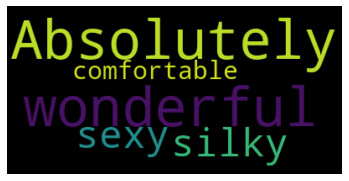

In [4]:
# Start with one review:
text = df.Review_Text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

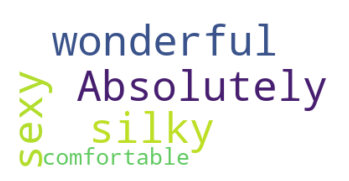

In [5]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size


6.0
4.0


<AxesSubplot:ylabel='Sentiment'>

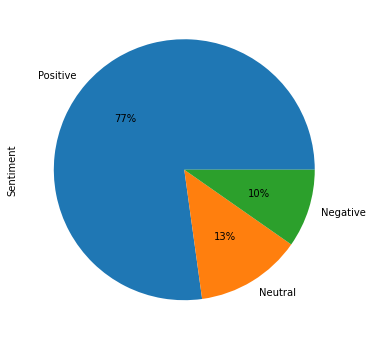

In [7]:
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:xlabel='Class_Name'>

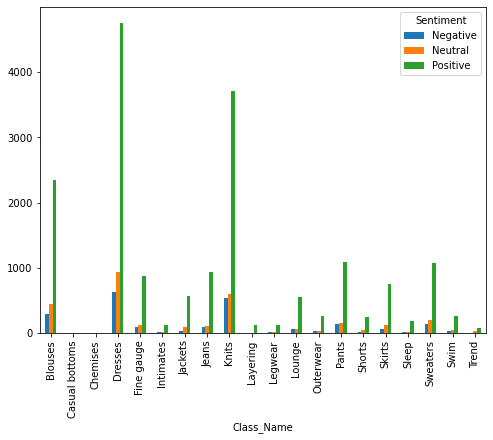

In [8]:
sentiment = df.groupby(['Class_Name', 'Sentiment']).Sentiment.count().unstack()
sentiment.plot(kind='bar')

<AxesSubplot:xlabel='Sentiment', ylabel='Rating'>

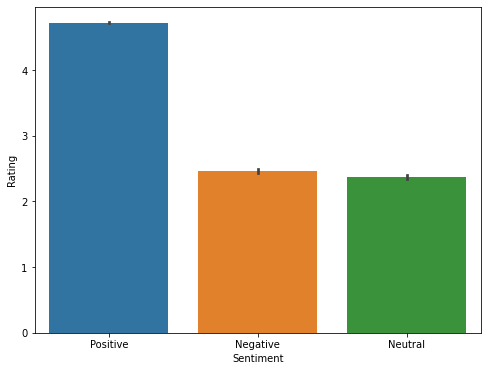

In [9]:
import seaborn as sns

sns.barplot(x='Sentiment', y='Rating' , data=df)

# Dropping unnecessary columns in the dataset

In [10]:
#Dropping unnecessary columns
to_drop = ['Clothing_ID','Age','Title','Rating','Recommended_IND',
           'Positive_Feedback_Count','Division_Name','Department_Name',
        'Class_Name']

In [11]:
df.drop(to_drop, inplace=True, axis=1)

In [12]:
df.head()

,ID,Review_Text,Sentiment
0,0,Absolutely wonderful - silky and sexy and comf...,Positive
1,1,Love this dress! it's sooo pretty. i happene...,Positive
2,2,I had such high hopes for this dress and reall...,Negative
3,3,"I love, love, love this jumpsuit. it's fun, fl...",Positive
4,4,This shirt is very flattering to all due to th...,Positive


# Check whether the Id is unique

In [13]:
df['ID'].is_unique

True

# Setting Id as the index

In [14]:
#Setting id as the index
df = df.set_index('ID')

In [15]:
df.head()

,Review_Text,Sentiment
ID,,
0,Absolutely wonderful - silky and sexy and comf...,Positive
1,Love this dress! it's sooo pretty. i happene...,Positive
2,I had such high hopes for this dress and reall...,Negative
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive
4,This shirt is very flattering to all due to th...,Positive


# filter the rows that has null values in the review column 

In [16]:
df = df[df['Review_Text'].notnull()]

In [17]:
df

,Review_Text,Sentiment
ID,,
0,Absolutely wonderful - silky and sexy and comf...,Positive
1,Love this dress! it's sooo pretty. i happene...,Positive
2,I had such high hopes for this dress and reall...,Negative
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive
4,This shirt is very flattering to all due to th...,Positive
...,...,...
23481,I was very happy to snag this dress at such a ...,Positive
23482,"It reminds me of maternity clothes. soft, stre...",Negative
23483,"This fit well, but the top was very see throug...",Neutral


# Data Cleaning

# Convert all text into lowercase

In [18]:
#Data Cleaning
df['lowercase'] = df['Review_Text'].apply(lambda x:" ".join(word.lower() for word in x.split()))

# Remove english stopwords

In [19]:
#import nltk
#nltk.download('stopwords')

In [20]:
from nltk.corpus import stopwords

In [21]:
stop_words = stopwords.words('english')

In [22]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
df['stopwords_removed'] = df['lowercase'].apply(lambda x:" ".join(word for word in x.split() if word not in stop_words))
df

,Review_Text,Sentiment,lowercase,stopwords_removed
ID,,,,
0,Absolutely wonderful - silky and sexy and comf...,Positive,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,Positive,love this dress! it's sooo pretty. i happened ...,"love dress! sooo pretty. happened find store, ..."
2,I had such high hopes for this dress and reall...,Negative,i had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"i love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo..."
4,This shirt is very flattering to all due to th...,Positive,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...
...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,Positive,i was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...
23482,"It reminds me of maternity clothes. soft, stre...",Negative,"it reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi..."
23483,"This fit well, but the top was very see throug...",Neutral,"this fit well, but the top was very see throug...","fit well, top see through. never would worked ..."


# Remove punctuations

In [24]:
df['punctuation_removed'] = df['stopwords_removed'].str.replace('[^\w\s]','')

C:\Users\User\AppData\Local\Temp\ipykernel_8252\2830395344.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['punctuation_removed'] = df['stopwords_removed'].str.replace('[^\w\s]','')


In [25]:
df

,Review_Text,Sentiment,lowercase,stopwords_removed,punctuation_removed
ID,,,,,
0,Absolutely wonderful - silky and sexy and comf...,Positive,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky sexy comfortable,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,Positive,love this dress! it's sooo pretty. i happened ...,"love dress! sooo pretty. happened find store, ...",love dress sooo pretty happened find store im ...
2,I had such high hopes for this dress and reall...,Negative,i had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...,high hopes dress really wanted work me initial...
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"i love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo...",love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,Positive,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,Positive,i was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...,happy snag dress great price easy slip flatter...
23482,"It reminds me of maternity clothes. soft, stre...",Negative,"it reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi...",reminds maternity clothes soft stretchy shiny ...
23483,"This fit well, but the top was very see throug...",Neutral,"this fit well, but the top was very see throug...","fit well, top see through. never would worked ...",fit well top see through never would worked me...


# Remove Numbers

In [26]:
df['numbers_removed'] = df['punctuation_removed'].str.replace('\d+', '')

C:\Users\User\AppData\Local\Temp\ipykernel_8252\1487499943.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['numbers_removed'] = df['punctuation_removed'].str.replace('\d+', '')


In [27]:
df

,Review_Text,Sentiment,lowercase,stopwords_removed,punctuation_removed,numbers_removed
ID,,,,,,
0,Absolutely wonderful - silky and sexy and comf...,Positive,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,Positive,love this dress! it's sooo pretty. i happened ...,"love dress! sooo pretty. happened find store, ...",love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...
2,I had such high hopes for this dress and reall...,Negative,i had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"i love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo...",love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,Positive,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,Positive,i was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...
23482,"It reminds me of maternity clothes. soft, stre...",Negative,"it reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi...",reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...
23483,"This fit well, but the top was very see throug...",Neutral,"this fit well, but the top was very see throug...","fit well, top see through. never would worked ...",fit well top see through never would worked me...,fit well top see through never would worked me...


# Remove Special Characters

In [28]:
df['special_characters_removed'] = df['numbers_removed'].str.replace(r'\W', ' ')
df

C:\Users\User\AppData\Local\Temp\ipykernel_8252\477093943.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['special_characters_removed'] = df['numbers_removed'].str.replace(r'\W', ' ')


,Review_Text,Sentiment,lowercase,stopwords_removed,punctuation_removed,numbers_removed,special_characters_removed
ID,,,,,,,
0,Absolutely wonderful - silky and sexy and comf...,Positive,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,Positive,love this dress! it's sooo pretty. i happened ...,"love dress! sooo pretty. happened find store, ...",love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...
2,I had such high hopes for this dress and reall...,Negative,i had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"i love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo...",love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,Positive,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,Positive,i was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...
23482,"It reminds me of maternity clothes. soft, stre...",Negative,"it reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi...",reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...
23483,"This fit well, but the top was very see throug...",Neutral,"this fit well, but the top was very see throug...","fit well, top see through. never would worked ...",fit well top see through never would worked me...,fit well top see through never would worked me...,fit well top see through never would worked me...


# Remove Single Characters

In [29]:
df['single_characters_removed'] = df['special_characters_removed'].str.replace(r'\s+[a-zA-Z]\s+', ' ')
df

C:\Users\User\AppData\Local\Temp\ipykernel_8252\810118089.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['single_characters_removed'] = df['special_characters_removed'].str.replace(r'\s+[a-zA-Z]\s+', ' ')


,Review_Text,Sentiment,lowercase,stopwords_removed,punctuation_removed,numbers_removed,special_characters_removed,single_characters_removed
ID,,,,,,,,
0,Absolutely wonderful - silky and sexy and comf...,Positive,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,Positive,love this dress! it's sooo pretty. i happened ...,"love dress! sooo pretty. happened find store, ...",love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...
2,I had such high hopes for this dress and reall...,Negative,i had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"i love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo...",love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,Positive,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,Positive,i was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...
23482,"It reminds me of maternity clothes. soft, stre...",Negative,"it reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi...",reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...
23483,"This fit well, but the top was very see throug...",Neutral,"this fit well, but the top was very see throug...","fit well, top see through. never would worked ...",fit well top see through never would worked me...,fit well top see through never would worked me...,fit well top see through never would worked me...,fit well top see through never would worked me...


In [30]:
other_stop_words = ['im','xs','esp','hte','lbs','tts','m','xtr','madetop','bettermaterial','organza','fabricit','gotclothes','pullbeautiful','loooong','softimage','afraidcute','lovedhappy','tracharming','friendloved','showcasing','jeanmodel','insufficient','stylebut','wantedliked','statethought','muchordered','recommendomg','cottonawesome','bonnetbeautiful','lovehorrible','nordic','brandgreat','combothe','cosplay','would','one','36d','30','arriv','inch','bc','would','petit','onlin','want','imo','0p','hte','etc','xx','125','lb','le','34b','tull','esp','sp','tt','34a','28','29','36','100','hem','135','xsp','130lb','im','didnt','39','el','ad','130','60','140','th','xl','ala','42','70','80','34c','wi','110','32c','135lb','ob','128','te','38','10','40','ca','118','120','34d','32','32dd','36c','25','ye','35','34f','20','138','12','me','someon','want','my','it','rees','teh','tri','of','ton','xx','le','tull','thi','too','but','may','you','did','that','tad','dont','wedg','will','them','especi','quirki','navi','wasnt','els','ad','bonu','whi','wouldv','the','ive','in','to','ala','minut','dd','wa','fenc','taup','sooooo','numer','plu','am','ye','boo','fo','adn','texa','six','maev']

In [31]:
df['other_stopwords_removed'] = df['single_characters_removed'].apply(lambda x:" ".join(word for word in x.split() if word not in other_stop_words))
df.other_stopwords_removed

ID
0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
2        high hopes dress really wanted work initially ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see through never worked glad abl...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fits perfectly ...
Name: other_stopwords_removed, Length: 22641, dtype: object

In [32]:
from textblob import Word

In [33]:
#import nltk
#nltk.download('wordnet')

# Lemmatization

In [34]:
#import nltk
#nltk.download('omw-1.4')

In [35]:
df['lemmatize'] = df['other_stopwords_removed'].apply(lambda x:" ".join(Word(word).lemmatize() for word in x.split()))
df.lemmatize

ID
0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see through never worked glad abl...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: lemmatize, Length: 22641, dtype: object

In [36]:
pd.Series("".join(df['lemmatize']).split()).value_counts()

dress           9893
fit             9722
size            8919
top             7343
like            6689
                ... 
bublouse           1
colorsdesign       1
throughfit         1
softamazing        1
platinum           1
Length: 32287, dtype: int64

In [37]:
review_text = df['lemmatize'].values #seperate review text from panda frmae in order to cleaning process
review_text

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store glad never ordered online petite bought petite love length hit little knee definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip up reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer major design flaw net layer sewn directly zipper c',
       ...,
       'fit well top see through never worked glad able try store order online different fabric great',
       'bought dress wedding summer cute unfortunately fit perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress delivered nordstrom tag found much cheaper looking',
       'dress lovely platinum feminine fit perfectly easy wear comfy highly recommend'],
      dtyp

# Tokenization

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
tokens = [] 

for words in range(0, len(review_text)):
    # tokenization words
    token = nltk.word_tokenize(review_text[words])

    tokens.append(token)

In [40]:
len(tokens)

22641

# Stemming

In [41]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stem_words(reviews):
       return [([ps.stem(word) for word in review]) for review in reviews]
 
    
    
stem_words_removed = stem_words(tokens)

In [42]:
stem_words_removed

[['absolut', 'wonder', 'silki', 'sexi', 'comfort'],
 ['love',
  'dress',
  'sooo',
  'pretti',
  'happen',
  'find',
  'store',
  'glad',
  'never',
  'order',
  'onlin',
  'petit',
  'bought',
  'petit',
  'love',
  'length',
  'hit',
  'littl',
  'knee',
  'definit',
  'true',
  'midi',
  'someon',
  'truli',
  'petit'],
 ['high',
  'hope',
  'dress',
  'realli',
  'want',
  'work',
  'initi',
  'order',
  'petit',
  'small',
  'usual',
  'size',
  'found',
  'outrag',
  'small',
  'small',
  'fact',
  'could',
  'zip',
  'up',
  'reorder',
  'petit',
  'medium',
  'ok',
  'overal',
  'top',
  'half',
  'comfort',
  'fit',
  'nice',
  'bottom',
  'half',
  'tight',
  'layer',
  'sever',
  'somewhat',
  'cheap',
  'net',
  'layer',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directli',
  'zipper',
  'c'],
 ['love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flirti',
  'fabul',
  'everi',
  'time',
  'wear',
  'get',
  'noth',
  'great',
  'compliment'],
 ['shi

In [43]:
def join(lem_tokens):
      return [' '.join([word for word in review]) for review in lem_tokens]

In [44]:
final_reviews = join(stem_words_removed)
df['fin'] = join(stem_words_removed)

In [45]:
df

,Review_Text,Sentiment,lowercase,stopwords_removed,punctuation_removed,numbers_removed,special_characters_removed,single_characters_removed,other_stopwords_removed,lemmatize,fin
ID,,,,,,,,,,,
0,Absolutely wonderful - silky and sexy and comf...,Positive,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolut wonder silki sexi comfort
1,Love this dress! it's sooo pretty. i happene...,Positive,love this dress! it's sooo pretty. i happened ...,"love dress! sooo pretty. happened find store, ...",love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store gla...,love dress sooo pretty happened find store gla...,love dress sooo pretti happen find store glad ...
2,I had such high hopes for this dress and reall...,Negative,i had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...,high hopes dress really wanted work initially ...,high hope dress really wanted work initially o...,high hope dress realli want work initi order p...
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"i love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo...",love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirti fabul everi...
4,This shirt is very flattering to all due to th...,Positive,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flatter due adjust front tie perfect len...
...,...,...,...,...,...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,Positive,i was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happi snag dress great price easi slip flatter...
23482,"It reminds me of maternity clothes. soft, stre...",Negative,"it reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi...",reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,remind matern cloth soft stretchi shini materi...
23483,"This fit well, but the top was very see throug...",Neutral,"this fit well, but the top was very see throug...","fit well, top see through. never would worked ...",fit well top see through never would worked me...

In [46]:
final_reviews

['absolut wonder silki sexi comfort',
 'love dress sooo pretti happen find store glad never order onlin petit bought petit love length hit littl knee definit true midi someon truli petit',
 'high hope dress realli want work initi order petit small usual size found outrag small small fact could zip up reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer major design flaw net layer sewn directli zipper c',
 'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment',
 'shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt',
 'love traci rees dress petit foot tall usual wear brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten narrow skirt take away embellish garment love color idea style work return dress',
 'ade basket last mintu see look like person store pick up went darkler color pale color realli gorgeou turn ma

# Create wordcloud for the final reviews

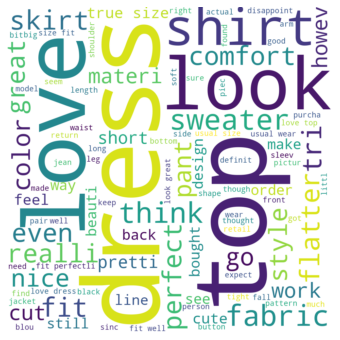

In [47]:
for word in final_reviews : 
  
        # concatenate the words 
        text = text + " " + word 
  
wordcloud = WordCloud(width=1000, height=1000,max_words=100, background_color="white").generate(text) 
  
# plot the WordCloud image  
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

In [48]:
# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

# Preparing tf-idf matrix

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=5, max_df=0.9)
finalized_1 = vectorizer.fit_transform(final_reviews).toarray()

In [50]:
finalized_1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.14862491,
        0.13721879],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [51]:
df

,Review_Text,Sentiment,lowercase,stopwords_removed,punctuation_removed,numbers_removed,special_characters_removed,single_characters_removed,other_stopwords_removed,lemmatize,fin
ID,,,,,,,,,,,
0,Absolutely wonderful - silky and sexy and comf...,Positive,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolut wonder silki sexi comfort
1,Love this dress! it's sooo pretty. i happene...,Positive,love this dress! it's sooo pretty. i happened ...,"love dress! sooo pretty. happened find store, ...",love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store gla...,love dress sooo pretty happened find store gla...,love dress sooo pretti happen find store glad ...
2,I had such high hopes for this dress and reall...,Negative,i had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...,high hopes dress really wanted work me initial...,high hopes dress really wanted work initially ...,high hope dress really wanted work initially o...,high hope dress realli want work initi order p...
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"i love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo...",love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirti fabul everi...
4,This shirt is very flattering to all due to th...,Positive,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,shirt flatter due adjust front tie perfect len...
...,...,...,...,...,...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,Positive,i was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happy snag dress great price easy slip flatter...,happi snag dress great price easi slip flatter...
23482,"It reminds me of maternity clothes. soft, stre...",Negative,"it reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi...",reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,reminds maternity clothes soft stretchy shiny ...,remind matern cloth soft stretchi shini materi...
23483,"This fit well, but the top was very see throug...",Neutral,"this fit well, but the top was very see throug...","fit well, top see through. never would worked ...",fit well top see through never would worked me...

In [52]:
overall = df.iloc[:,1].values

overall

array(['Positive', 'Positive', 'Negative', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [53]:
#Dividing Data into Training and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finalized_1, overall, test_size=0.2, random_state=0)

# Apply Random Forest Algorithm before tfidf 

In [54]:
#Training the Model
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [55]:
#Making Predictions and Evaluating the Model
predictions = text_classifier.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
a0 = accuracy_score(y_test, predictions)
print("Accuracy:",a0)

[[  14   49  350]
 [  10   81  533]
 [   3   12 3477]]
              precision    recall  f1-score   support

    Negative       0.52      0.03      0.06       413
     Neutral       0.57      0.13      0.21       624
    Positive       0.80      1.00      0.89      3492

    accuracy                           0.79      4529
   macro avg       0.63      0.39      0.39      4529
weighted avg       0.74      0.79      0.72      4529

Accuracy: 0.7886950761757562


# Create tf-idf matrix

In [57]:
#TF-IDF using the Scikit-Learn Library
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer(max_features=2500, min_df=5, max_df=0.9)
finalized_2 = CountVectorizer.fit_transform(final_reviews)

In [58]:
tf_matrix = CountVectorizer.transform(final_reviews).toarray()
print (tf_matrix)
tf_matrix.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(22641, 2500)

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfTran = TfidfTransformer()
tfidfmatrix = tfidfTran.fit_transform(tf_matrix)
print (tfidfmatrix)

  (0, 2451)	0.4420856196617878
  (0, 1909)	0.5617023758309074
  (0, 1853)	0.5134101889061858
  (0, 437)	0.26981434668273907
  (0, 6)	0.390718494732011
  (1, 2264)	0.25722532505977114
  (1, 2262)	0.15813631117042545
  (1, 2053)	0.1521705424329997
  (1, 1991)	0.3152817193976325
  (1, 1983)	0.21986368014774646
  (1, 1618)	0.14841820831975905
  (1, 1544)	0.45265045719310676
  (1, 1466)	0.11680590873969388
  (1, 1453)	0.16066990235449002
  (1, 1398)	0.21802500250085705
  (1, 1315)	0.2996579433065068
  (1, 1248)	0.16555896567999356
  (1, 1225)	0.1275397909242799
  (1, 1201)	0.14169016454338013
  (1, 1159)	0.19985002361366616
  (1, 1026)	0.18583678537444887
  (1, 973)	0.26047107107020634
  (1, 925)	0.2014846961625731
  (1, 801)	0.17837530125772377
  (1, 650)	0.09614800158797654
  :	:
  (22639, 1236)	0.08198401762414954
  (22639, 1232)	0.1273423020139439
  (22639, 1214)	0.08723720524852817
  (22639, 916)	0.12796233009201022
  (22639, 865)	0.1608197461254287
  (22639, 808)	0.14622821266392702
 

In [60]:
#Dividing Data into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(tfidfmatrix, overall, test_size=0.2, random_state=0)

In [61]:
finalized_2.shape

(22641, 2500)

# Displaying final vocabulary

In [62]:
CountVectorizer.vocabulary_

{'absolut': 6,
 'wonder': 2451,
 'silki': 1909,
 'sexi': 1853,
 'comfort': 437,
 'love': 1248,
 'dress': 650,
 'sooo': 1991,
 'pretti': 1618,
 'happen': 973,
 'find': 801,
 'store': 2053,
 'glad': 925,
 'never': 1398,
 'order': 1466,
 'onlin': 1453,
 'petit': 1544,
 'bought': 245,
 'length': 1201,
 'hit': 1026,
 'littl': 1225,
 'knee': 1159,
 'definit': 567,
 'true': 2262,
 'midi': 1315,
 'someon': 1983,
 'truli': 2264,
 'high': 1014,
 'hope': 1039,
 'realli': 1694,
 'want': 2373,
 'work': 2456,
 'initi': 1090,
 'small': 1952,
 'usual': 2339,
 'size': 1922,
 'found': 865,
 'fact': 764,
 'could': 491,
 'zip': 2498,
 'up': 2330,
 'reorder': 1723,
 'medium': 1301,
 'ok': 1443,
 'overal': 1480,
 'top': 2232,
 'half': 964,
 'fit': 808,
 'nice': 1401,
 'bottom': 244,
 'tight': 2209,
 'layer': 1188,
 'sever': 1850,
 'somewhat': 1986,
 'cheap': 367,
 'net': 1396,
 'major': 1272,
 'design': 580,
 'flaw': 820,
 'sewn': 1852,
 'directli': 603,
 'zipper': 2499,
 'jumpsuit': 1141,
 'fun': 890,
 'fl

In [63]:
len(CountVectorizer.vocabulary_)

2500

# Apply Support vector machine After tfidf 

In [64]:
#Training the Model
from sklearn import svm
classifier_linear1 = svm.SVC(kernel='linear')
classifier_linear1.fit(X_train1, y_train1)

SVC(kernel='linear')

In [65]:
#Making Predictions and Evaluating the Model
y_pred1 = classifier_linear1.predict(X_test1)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))
a1 = accuracy_score(y_test1, y_pred1)
print("Accuracy:",a1)

[[  60  147  206]
 [  95  240  289]
 [  37   80 3375]]
              precision    recall  f1-score   support

    Negative       0.31      0.15      0.20       413
     Neutral       0.51      0.38      0.44       624
    Positive       0.87      0.97      0.92      3492

    accuracy                           0.81      4529
   macro avg       0.57      0.50      0.52      4529
weighted avg       0.77      0.81      0.79      4529

Accuracy: 0.8114374034003091


In [67]:
#Dividing Data into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(tfidfmatrix, overall, test_size=0.20, random_state=0)

# Apply KNN Algorithm After tfidf 

In [68]:
#Training the Model
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(X_train2, y_train2)

KNeighborsClassifier()

In [69]:
#Making Predictions and Evaluating the Model
predictions2 = classifier2.predict(X_test2)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test2, predictions2))
print(classification_report(y_test2, predictions2))
a2 = accuracy_score(y_test2, predictions2)
print("Accuracy:",a2)

[[  79   84  250]
 [ 102  131  391]
 [  80   88 3324]]
              precision    recall  f1-score   support

    Negative       0.30      0.19      0.23       413
     Neutral       0.43      0.21      0.28       624
    Positive       0.84      0.95      0.89      3492

    accuracy                           0.78      4529
   macro avg       0.52      0.45      0.47      4529
weighted avg       0.73      0.78      0.75      4529

Accuracy: 0.7803047030249504


# Apply Random Forest Algorithm After tfidf 

In [71]:
#Dividing Data into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(tfidfmatrix, overall, test_size=0.20)

In [72]:
#Training the Model
from sklearn.ensemble import RandomForestClassifier

text_classifier3 = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier3.fit(X_train3, y_train3)

RandomForestClassifier(n_estimators=200, random_state=0)

In [73]:
#Making Predictions and Evaluating the Model
predictions3 = text_classifier3.predict(X_test3)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test3,predictions3))
print(classification_report(y_test3,predictions3))
a3 = accuracy_score(y_test3, predictions3)
print("Accuracy:",a3)

[[  10   62  385]
 [   9   85  536]
 [   4   11 3427]]
              precision    recall  f1-score   support

    Negative       0.43      0.02      0.04       457
     Neutral       0.54      0.13      0.22       630
    Positive       0.79      1.00      0.88      3442

    accuracy                           0.78      4529
   macro avg       0.59      0.38      0.38      4529
weighted avg       0.72      0.78      0.70      4529

Accuracy: 0.7776551115036432


# Apply Multinomial Naive Bayes Algorithm After tfidf 

In [75]:
#Dividing Data into Training and Test Sets
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train4, X_test4, y_train4, y_test4 = train_test_split(tfidfmatrix, overall, test_size=0.2,random_state=0) 


In [76]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
text_classifier4 = MultinomialNB()
text_classifier4.fit(X_train4, y_train4)

MultinomialNB()

In [77]:
#Making Predictions and Evaluating the Model
predictions4 = text_classifier4.predict(X_test4)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test4,predictions4))
print(classification_report(y_test4,predictions4))
a4 = accuracy_score(y_test4, predictions4)

[[   3   49  361]
 [   7   79  538]
 [   3   14 3475]]
              precision    recall  f1-score   support

    Negative       0.23      0.01      0.01       413
     Neutral       0.56      0.13      0.21       624
    Positive       0.79      1.00      0.88      3492

    accuracy                           0.79      4529
   macro avg       0.53      0.38      0.37      4529
weighted avg       0.71      0.79      0.71      4529



In [79]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",a4)

Accuracy: 0.7853830867741223


In [80]:
print("=========================Accuracy of the Models=============================\n")
print("SVM Algorithm : ",a1)
print("KNN Algorithm : ",a2)
print("Random Forest Algorithm : ",a3)
print("Multinomial Naive Bayes Algorithm :",a4)

=========================Accuracy of the Models=============================

SVM Algorithm :  0.8114374034003091
KNN Algorithm :  0.7803047030249504
Random Forest Algorithm :  0.7776551115036432
Multinomial Naive Bayes Algorithm : 0.7853830867741223


# Conclusion - Since SVM has the highest accuracy it is the best model